<a href="https://colab.research.google.com/github/Shivani11032006/Daily-work/blob/main/Newspaper_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Read the file into a DataFrame
df = pd.read_csv(file_name)

# Display the DataFrame
print(df.head())

Saving NewspaperData.csv to NewspaperData.csv
            Newspaper    daily   sunday
0       Baltimore Sun  391.952  488.506
1        Boston Globe  516.981  798.298
2       Boston Herald  355.628  235.084
3  Charlotte Observer  238.555  299.451
4   Chicago Sun Times  537.780  559.093


In [3]:
df.shape

(34, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [8]:
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


array([[<Axes: title={'center': 'daily'}>,
        <Axes: title={'center': 'sunday'}>]], dtype=object)

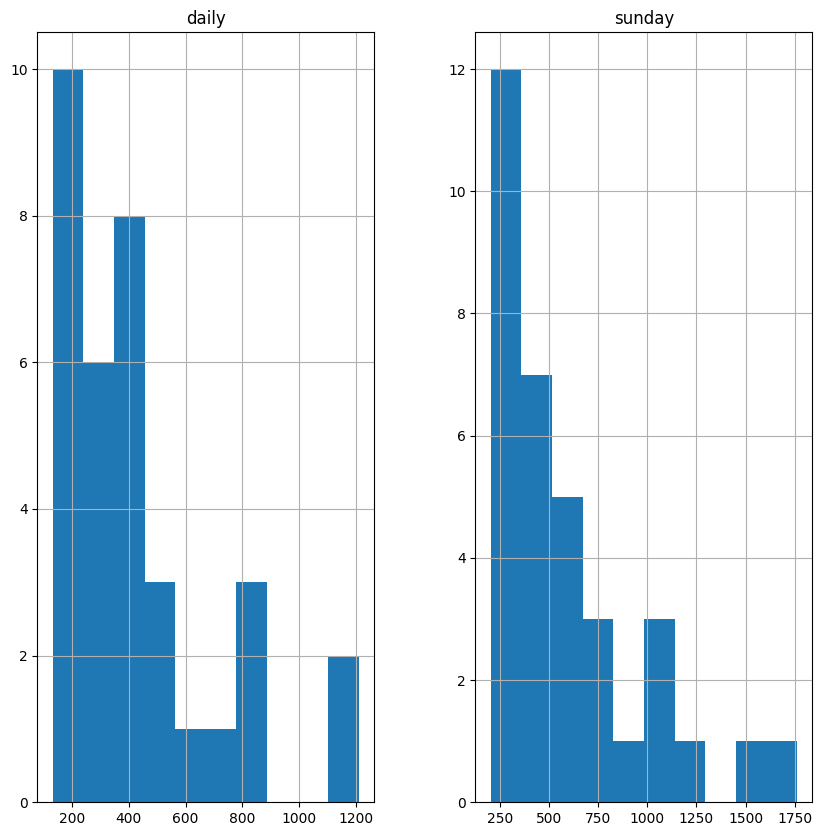

In [9]:
df.hist(figsize=(10,10))

In [7]:
df.tail()

,Newspaper,daily,sunday
29,San Francisco Chronicle,570.364,704.322
30,St. Louis Post-Dispatch,391.286,585.681
31,St. Paul Pioneer Press,201.860,267.781
32,Tampa Tribune,321.626,408.343
33,Washington Post,838.902,1165.567


In [12]:
df.corr

<bound method DataFrame.corr of                          Newspaper     daily    sunday
0                    Baltimore Sun   391.952   488.506
1                     Boston Globe   516.981   798.298
2                    Boston Herald   355.628   235.084
3               Charlotte Observer   238.555   299.451
4                Chicago Sun Times   537.780   559.093
5                  Chicago Tribune   733.775  1133.249
6              Cincinnati Enquirer   198.832   348.744
7                      Denver Post   252.624   417.779
8              Des Moines Register   206.204   344.522
9                 Hartford Courant   231.177   323.084
10               Houston Chronicle   449.755   620.752
11                Kansas City Star   288.571   423.305
12         Los Angeles Daily  News   185.736   202.614
13               Los Angeles Times  1164.388  1531.527
14                    Miami Herald   444.581   553.479
15        Minneapolis Star Tribune   412.871   685.975
16      New Orleans Times-Picayune   272.280   324.241
17             New York Daily News   781.796   983.240
18                  New York Times  1209.225  1762.015
19                         Newsday   825.512   960.308
20              Omaha World Herald   223.748   284.611
21          Orange County Register   354.843   407.760
22           Philadelphia Inquirer   515.523   982.663
23                Pittsburgh Press   220.465   557.000
24              Portland Oregonian   337.672   440.923
25     Providence Journal-Bulletin   197.120   268.060
26  Rochester Democrat & Chronicle   133.239   262.048
27             Rocky Mountain News   374.009   432.502
28                  Sacramento Bee   273.844   338.355
29         San Francisco Chronicle   570.364   704.322
30         St. Louis Post-Dispatch   391.286   585.681
31          St. Paul Pioneer Press   201.860   267.781
32                   Tampa Tribune   321.626   408.343
33                 Washington Post   838.902  1165.567>

In [13]:
df.isnull()

,Newspaper,daily,sunday
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


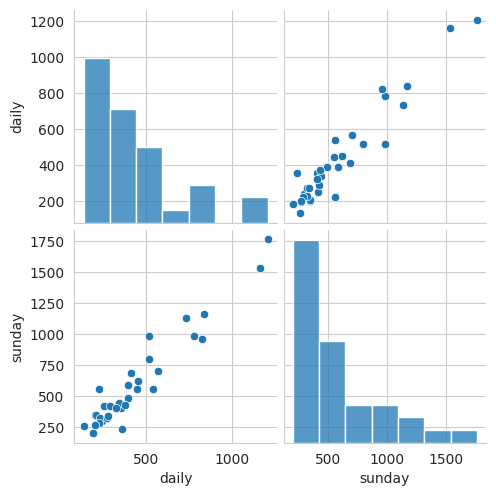

In [14]:
sns.set_style('whitegrid')
sns.pairplot(df)
plt.show()

<ipython-input-22-60e927544913>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['daily'])


<Axes: xlabel='daily', ylabel='Density'>

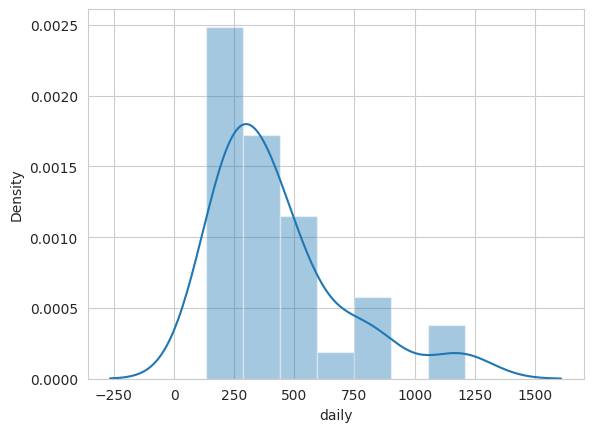

In [22]:
import seaborn as sns
sns.distplot(df['daily'])

<ipython-input-23-00a7cbb247ee>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sunday'])


<Axes: xlabel='sunday', ylabel='Density'>

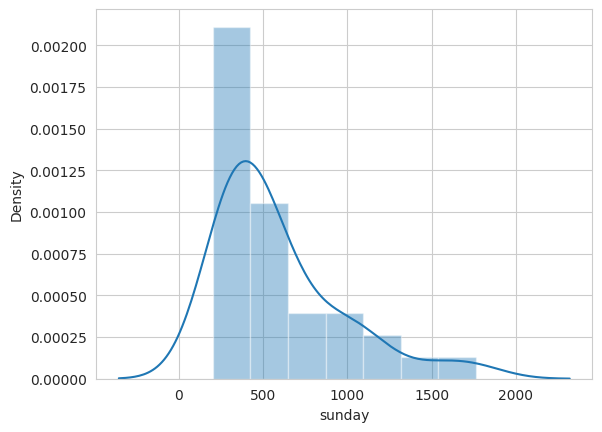

In [23]:
import seaborn as sns
sns.distplot(df['sunday'])

In [27]:
import statsmodels.formula.api as smf
model = smf.ols(formula='daily ~ sunday', data=df).fit()


<Axes: xlabel='sunday', ylabel='daily'>

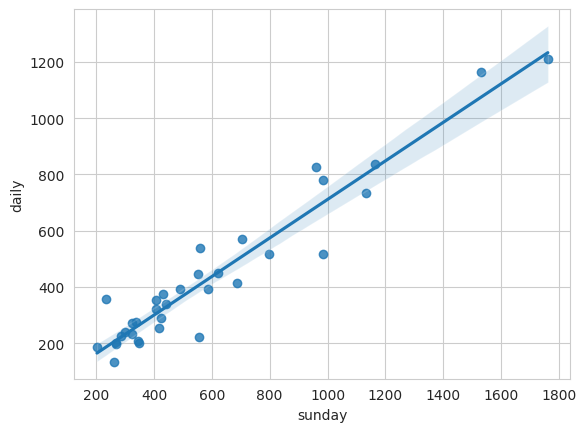

In [28]:
sns.regplot(x="sunday", y="daily", data=df)

In [29]:
print(model.tvalues, '\n',model.pvalues)


Intercept     1.022773
sunday       18.934840
dtype: float64 
 Intercept    3.140853e-01
sunday       6.016802e-19
dtype: float64


In [30]:
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [31]:
newdata=pd.DataFrame({'sunday':[1,0]})
newdata

,sunday
0,1
1,0


In [32]:
newdata=pd.Series([200,300])

In [34]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [41]:
# Create a DataFrame with the 'sunday' column for prediction
newdata = pd.DataFrame({'sunday': [200, 300]})

# Now, predict using this DataFrame
data_pred = model.predict(newdata)

# Print or use the predictions
print(data_pred)

0    162.885133
1    231.411638
dtype: float64


In [43]:
import pandas as pd

# Specify an index when creating the DataFrame
new_data = pd.DataFrame({'HP': [40], 'WT': [30]}, index=[0])
# Or, using a list for the data with a single element is equivalent
#new_data = pd.DataFrame({'HP': [40], 'WT': [30]}) # This will auto generate an index starting from 0
# Or
# new_data = pd.DataFrame({'HP': 40, 'WT': 30}, index=[0])
print(new_data)

   HP  WT
0  40  30


In [40]:
import pandas as pd
import statsmodels.formula.api as smf

# Assuming you have your data in a DataFrame called 'df' and have already fitted the model:
# model = smf.ols(formula='daily ~ sunday', data=df).fit()

# Create a DataFrame with the 'sunday' column for prediction
newdata = pd.DataFrame({'sunday': [200, 300]})

# Predict using this DataFrame
predictions = model.predict(newdata)

# Print the predictions
print(predictions)

0    162.885133
1    231.411638
dtype: float64
